# 权重衰退（Weight Decay）——防止过拟合的第一招

---

## 一、核心一句话

> **权重衰退 = 惩罚权重太大，让模型别太"聪明"，防止过拟合。**

---

## 二、为什么需要权重衰退？

### 回顾上一节的过拟合

```
过拟合 = 模型把噪声也学进去了
       = 权重 w 调得太"精细"了

例子：
  真实规律：w = [5, 1.2, -3.4, 5.6, 0, 0, ..., 0]
                 ↑   ↑    ↑     ↑   ↑→ 应该是 0
  
  过拟合后：w = [5, 1.2, -3.4, 5.6, 0.8, -0.3, ..., -0.5]
                                     ↑→ 不该有值，但模型学出来了
```

**怎么解决？**

```
方案1：减少参数数量（用更小的模型）
       → 但可能会欠拟合

方案2：限制每个参数的值不要太大
       → 权重衰退就是这个！
```

---

## 三、权重衰退理解方式

### 方式 2：柔性限制（实际用的）

```
不直接限制 w 的大小
而是在损失函数里加一个"惩罚项"：

新的损失函数 = 原损失 + λ/2 ||w||²
              ↑         ↑
            老的       惩罚项
            
L_new = L(w, b) + λ/2 ||w||²
```

**什么意思？**

```
原来：只管让预测准确（L 小）
现在：既要预测准确，又要 w 不能太大

如果 w 太大：
  → ||w||² 很大
  → L_new 变大
  → 模型不愿意让 w 太大
  
λ（lambda）控制惩罚强度：
  λ = 0   → 没有惩罚，等于没加权重衰退
  λ 很大  → 惩罚很重，w 会被压得很小
```

---

## 五、用图理解权重衰退的作用

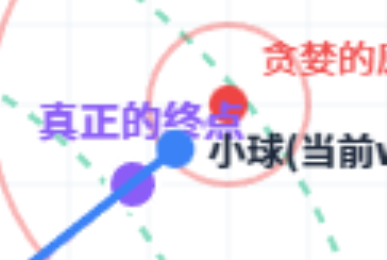

**为什么叫"衰退"？
→ 每次更新前先把 w 缩小一点**

---

## 六、代码怎么用？

### 写法 2：用 PyTorch 的 `weight_decay`（推荐）

```python
# 在优化器里直接指定
trainer = torch.optim.SGD(
    net.parameters(),
    lr=0.01,
    weight_decay=0.01  # ← 就这一个参数！
)

# 训练时正常写
for X, y in train_iter:
    l = loss(net(X), y)  # 不用手动加惩罚项
    trainer.zero_grad()
    l.backward()
    trainer.step()       # 更新时自动做权重衰退
```

**PyTorch 会自动帮你：**
```
在梯度下降时，自动执行：
  w = (1 - η×weight_decay) × w - η × ∂L/∂w
  
你只需要设置 weight_decay 这个参数！
```

---

## 七、λ（lambda / weight_decay）怎么选？

```
λ = 0      → 没有权重衰退，可能过拟合
λ = 0.0001 → 很轻的惩罚
λ = 0.001  → 轻度惩罚（常用）
λ = 0.01   → 中度惩罚（常用）
λ = 0.1    → 重度惩罚
λ 很大     → w 被压得太小，可能欠拟合
```

**实际怎么选？**

```
和隐藏层大小、学习率一样，靠试！

常见策略：
  先不加权重衰退（λ=0）训练一次
  → 如果过拟合了（训练精度>>测试精度）
  → 加上权重衰退，λ 从 0.001 开始试
  → 看测试精度有没有提升
```

---

## 八、你需要掌握的

### 🔴 必须记住

**① 权重衰退是干什么的**

```
防止权重 w 太大
防止过拟合
```

**② 怎么用**

```python
trainer = torch.optim.SGD(
    net.parameters(),
    lr=0.01,
    weight_decay=0.01  # ← 加这一行
)
```

**③ λ 的作用**

```
λ = 0       → 没有权重衰退
λ 越大      → 惩罚越重，w 越小
λ 太大      → 可能欠拟合
```

**④ 为什么叫"衰退"**

```
每次更新前，先把 w 缩小一点点
w_new = (1 - ηλ) × w_old - ...
        ↑
      小于1，所以是"衰退"
```


## 九、自查题

```
① 权重衰退是防止什么的？
   → 过拟合（权重太大）

② PyTorch 里怎么加权重衰退？
   → 优化器里设置 weight_decay 参数

③ weight_decay = 0 是什么意思？
   → 没有权重衰退

④ weight_decay 太大会怎样？
   → w 被压得太小，可能欠拟合

⑤ 为什么叫"衰退"？
   → 每次更新前先把 w 缩小一点
```

**5 个都对 → 过关！**

---

## 十、总结

```
防止过拟合的第一招：权重衰退

原理：
  在损失函数里加惩罚项 λ/2 ||w||²
  → 让模型不敢把 w 调太大
  
效果：
  每次更新前先把 w 缩小一点
  → w 变小
  → 模型变简单
  → 不容易过拟合
  
用法：
  优化器里加一个 weight_decay 参数
  常用值：0.001 ~ 0.01
```